# V2G Implementation in scenario analysis (2023)

In [1]:
# load libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import calendar

# load data
#sdge = pd.read_csv('sdgeload30.csv')
hr_load = pd.read_csv('hrload_23.csv')
hr_load['Datetime'] = pd.to_datetime(hr_load['Datetime'])
ev_avail = pd.read_csv('evavail.csv')

# data prep 
# convert load data to kwh from mwh
hr_load['SDGE'] = hr_load['SDGE'] * 1000
# convert to datetime format 
hr_load['Datetime'] = pd.to_datetime(hr_load['Datetime'])
hr_load['year'] = hr_load['Datetime'].dt.year
hr_load['month'] = hr_load['Datetime'].dt.month
hr_load['hour'] = hr_load['Datetime'].dt.hour
hr_load['month_name'] = hr_load['Datetime'].dt.strftime('%B')

# Formulas

1. BEV_Contributionper hour = Time of Day(AvailableEVs * Participation %) 
1. BEV_Storage = (71.8 kWh * % Willing to give)) * 2
1. V2G = BEV_Contributionper hour * BEV_Storage * Energy loss % 
1. Peak_shave_Load = total_sdge_load_for_hour - V2GTimeOfDay

# Scenarios only looking at specific hour impact

In [2]:
# scenario 1

# June at 6pm 
time_of_day = hr_load[(hr_load['Datetime'].dt.month == 6) & (hr_load['Datetime'].dt.hour == 18)]
total_sdge_load_for_hour = time_of_day['SDGE'].mean()
total_sdge_load_for_hour

# time of day = 6pm
# participation % = 5%
BEV_Contribution_per_hour = (ev_avail.loc[ev_avail['hour'] == 18, 'sd_ev_week'].iloc[0]) * .05   #num ev's contributing    

# % willing to give = 10%
BEV_storage = 71.8 * .1 #kwh

# energy loss = 10%, so we multiply by .9 
v2g = BEV_Contribution_per_hour * BEV_storage * .9 

# new load at 6pm in June
new_load = total_sdge_load_for_hour - v2g
new_load / 1000 #convert to mwh 

1993.5689072005953

In [3]:
# scenario 2

# August at 8pm 
time_of_day = hr_load[(hr_load['Datetime'].dt.month == 8) & (hr_load['Datetime'].dt.hour == 20)]
total_sdge_load_for_hour = time_of_day['SDGE'].mean()
total_sdge_load_for_hour

# time of day = 8pm
# participation % = 25%
BEV_Contribution_per_hour = (ev_avail.loc[ev_avail['hour'] == 20, 'sd_ev_week'].iloc[0]) * .25   #num ev's contributing    

# % willing to give = 25%
BEV_storage = 71.8 * .25 #kwh

# energy loss = 10%, so we multiply by .9 
v2g = BEV_Contribution_per_hour * BEV_storage * .9 

# new load at 8pm in August
new_load = total_sdge_load_for_hour - v2g
new_load / 1000 #convert to mwh

2911.245555482251

In [4]:
# scenario 3

# September at 9pm 
time_of_day = hr_load[(hr_load['Datetime'].dt.month == 9) & (hr_load['Datetime'].dt.hour == 21)]
total_sdge_load_for_hour = time_of_day['SDGE'].mean()
total_sdge_load_for_hour

# time of day = 9pm
# participation % = 50%
BEV_Contribution_per_hour = (ev_avail.loc[ev_avail['hour'] == 21, 'sd_ev_week'].iloc[0]) * .25   #num ev's contributing    

# % willing to give = 30%
BEV_storage = 71.8 * .3 #kwh

# energy loss = 10%, so we multiply by .9 
v2g = BEV_Contribution_per_hour * BEV_storage * .9 

# new load at 9pm in September
new_load = total_sdge_load_for_hour - v2g
new_load / 1000 #convert to mwh

2518.408915180059

# Scenarios looking at time period impact

In [5]:
# scenario 4
# over time period 6 - 10pm 

# August from 6pm - 10pm
# 6pm
time_of_day_6p = hr_load[(hr_load['Datetime'].dt.month == 8) & (hr_load['Datetime'].dt.hour == 18)]
total_sdge_load_for_6p = time_of_day_6p['SDGE'].mean()

# 7pm
time_of_day_7p = hr_load[(hr_load['Datetime'].dt.month == 8) & (hr_load['Datetime'].dt.hour == 19)]
total_sdge_load_for_7p = time_of_day_7p['SDGE'].mean()

# 8pm
time_of_day_8p = hr_load[(hr_load['Datetime'].dt.month == 8) & (hr_load['Datetime'].dt.hour == 20)]
total_sdge_load_for_8p = time_of_day_8p['SDGE'].mean()

# 9pm 
time_of_day_9p = hr_load[(hr_load['Datetime'].dt.month == 8) & (hr_load['Datetime'].dt.hour == 21)]
total_sdge_load_for_9p = time_of_day_9p['SDGE'].mean()

# 10pm 
time_of_day_10p = hr_load[(hr_load['Datetime'].dt.month == 8) & (hr_load['Datetime'].dt.hour == 22)]
total_sdge_load_for_10p = time_of_day_10p['SDGE'].mean()

# participation % = 25%
# over the 5 hour period so .2
#6pm
BEV_Contribution_6p = (ev_avail.loc[ev_avail['hour'] == 18, 'sd_ev_week'].iloc[0]) * .25  #num ev's contributing
BEV_Contribution_7p = (ev_avail.loc[ev_avail['hour'] == 19, 'sd_ev_week'].iloc[0]) * .25
BEV_Contribution_8p = (ev_avail.loc[ev_avail['hour'] == 20, 'sd_ev_week'].iloc[0]) * .25
BEV_Contribution_9p = (ev_avail.loc[ev_avail['hour'] == 21, 'sd_ev_week'].iloc[0]) * .25
BEV_Contribution_10p = (ev_avail.loc[ev_avail['hour'] == 22, 'sd_ev_week'].iloc[0]) * .25

# % willing to give = 50% of battery
BEV_storage = 71.8 * .5 * .2 #kwh

# energy loss = 10%, so we multiply by .9 
v2g_6p = BEV_Contribution_6p * BEV_storage * .9 
v2g_7p = BEV_Contribution_7p * BEV_storage * .9
v2g_8p = BEV_Contribution_8p * BEV_storage * .9
v2g_9p = BEV_Contribution_9p * BEV_storage * .9
v2g_10p = BEV_Contribution_10p * BEV_storage * .9

# load decrease 
total_sdge_load = (total_sdge_load_for_6p + total_sdge_load_for_7p + total_sdge_load_for_8p + total_sdge_load_for_9p 
+ total_sdge_load_for_10p)
total_ev_to_grid = (v2g_6p + v2g_7p + v2g_8p + v2g_9p + v2g_10p)
new_load = total_sdge_load - total_ev_to_grid
new_load / 1000 #convert to mwh

15105.378775772178

In [6]:
new_load_6p = (total_sdge_load_for_6p - v2g_6p) / 1000
new_load_7p = (total_sdge_load_for_7p - v2g_7p) / 1000
new_load_8p = (total_sdge_load_for_8p - v2g_8p) / 1000
new_load_9p = (total_sdge_load_for_9p - v2g_9p) / 1000
new_load_10p = (total_sdge_load_for_10p - v2g_10p) / 1000

print(new_load_6p, new_load_7p, new_load_8p, new_load_9p, new_load_10p)

3010.9160413793206 3096.178650943836 3060.5125447735454 3031.406878536722 2906.3646601387527


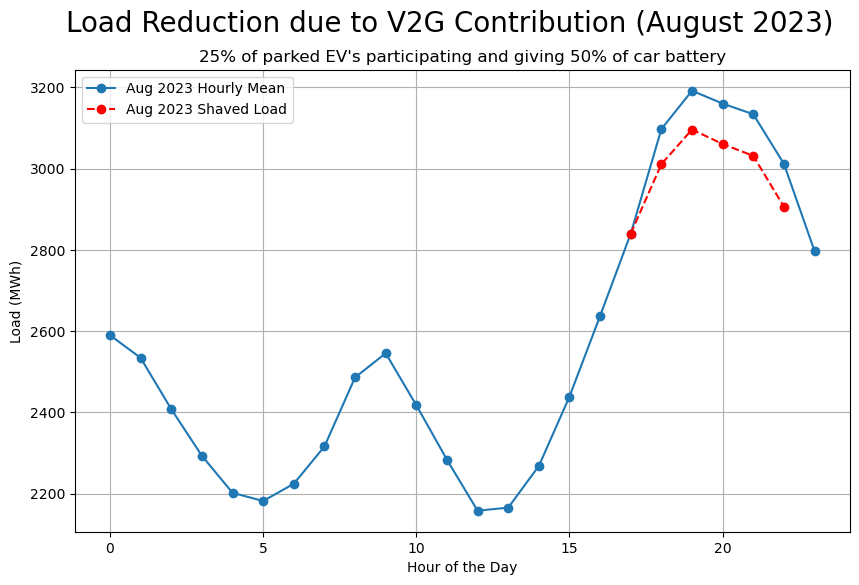

In [7]:
# visualizing scenario 4

august_data = hr_load[hr_load['month'] == 8]
avg_hourly_sdge = august_data.groupby('hour')['SDGE'].mean()
avg_hourly_sdge = avg_hourly_sdge / 1000

new_load_hours = [17, 18, 19, 20, 21, 22]
new_load_values = [avg_hourly_sdge[17], new_load_6p, new_load_7p, new_load_8p, new_load_9p, new_load_10p]


plt.figure(figsize=(10, 6))
plt.plot(avg_hourly_sdge.index, avg_hourly_sdge.values, marker='o', label='Aug 2023 Hourly Mean')
plt.plot(new_load_hours, new_load_values, marker='o', linestyle='--', color='red', label='Aug 2023 Shaved Load')
plt.suptitle('Load Reduction due to V2G Contribution (August 2023)', fontsize = 20)
plt.title('25% of parked EV\'s participating and giving 50% of car battery', fontsize = 12)
plt.xlabel('Hour of the Day')
plt.ylabel('Load (MWh)')
plt.grid(True)
plt.legend()
plt.savefig('plot_august_25_50.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# scenario 5 
# september 6-9pm 

# 6pm
time_of_day_6p = hr_load[(hr_load['Datetime'].dt.month == 9) & (hr_load['Datetime'].dt.hour == 18)]
total_sdge_load_for_6p = time_of_day_6p['SDGE'].mean()

# 7pm
time_of_day_7p = hr_load[(hr_load['Datetime'].dt.month == 9) & (hr_load['Datetime'].dt.hour == 19)]
total_sdge_load_for_7p = time_of_day_7p['SDGE'].mean()

# 8pm
time_of_day_8p = hr_load[(hr_load['Datetime'].dt.month == 9) & (hr_load['Datetime'].dt.hour == 20)]
total_sdge_load_for_8p = time_of_day_8p['SDGE'].mean()

# 9pm 
time_of_day_9p = hr_load[(hr_load['Datetime'].dt.month == 9) & (hr_load['Datetime'].dt.hour == 21)]
total_sdge_load_for_9p = time_of_day_9p['SDGE'].mean()

# participation % = 25%
BEV_Contribution_6p = (ev_avail.loc[ev_avail['hour'] == 18, 'sd_ev_week'].iloc[0]) * .25   #num ev's contributing
BEV_Contribution_7p = (ev_avail.loc[ev_avail['hour'] == 19, 'sd_ev_week'].iloc[0]) * .25
BEV_Contribution_8p = (ev_avail.loc[ev_avail['hour'] == 20, 'sd_ev_week'].iloc[0]) * .25
BEV_Contribution_9p = (ev_avail.loc[ev_avail['hour'] == 21, 'sd_ev_week'].iloc[0]) * .25

# % willing to give = 50% of battery
BEV_storage = 71.8 * .5 #kwh

# energy loss = 10%, so we multiply by .9 
v2g_6p = BEV_Contribution_6p * BEV_storage * .9 
v2g_7p = BEV_Contribution_7p * BEV_storage * .9
v2g_8p = BEV_Contribution_8p * BEV_storage * .9
v2g_9p = BEV_Contribution_9p * BEV_storage * .9

# load decrease 
total_sdge_load = (total_sdge_load_for_6p + total_sdge_load_for_7p + total_sdge_load_for_8p + total_sdge_load_for_9p)
total_ev_to_grid = (v2g_6p + v2g_7p + v2g_8p + v2g_9p)
new_load = total_sdge_load - total_ev_to_grid
new_load / 1000 #convert to mwh

9440.345234081102

In [9]:
# scenario 6 
# over time period 6 - 10pm 

# July from 6pm - 10pm
# 6pm
time_of_day_6p = hr_load[(hr_load['Datetime'].dt.month == 7) & (hr_load['Datetime'].dt.hour == 18)]
total_sdge_load_for_6p = time_of_day_6p['SDGE'].mean()

# 7pm
time_of_day_7p = hr_load[(hr_load['Datetime'].dt.month == 7) & (hr_load['Datetime'].dt.hour == 19)]
total_sdge_load_for_7p = time_of_day_7p['SDGE'].mean()

# 8pm
time_of_day_8p = hr_load[(hr_load['Datetime'].dt.month == 7) & (hr_load['Datetime'].dt.hour == 20)]
total_sdge_load_for_8p = time_of_day_8p['SDGE'].mean()

# 9pm 
time_of_day_9p = hr_load[(hr_load['Datetime'].dt.month == 7) & (hr_load['Datetime'].dt.hour == 21)]
total_sdge_load_for_9p = time_of_day_9p['SDGE'].mean()

# 10pm 
time_of_day_10p = hr_load[(hr_load['Datetime'].dt.month == 7) & (hr_load['Datetime'].dt.hour == 22)]
total_sdge_load_for_10p = time_of_day_10p['SDGE'].mean()

# participation % = 40%
#6pm
BEV_Contribution_6p = (ev_avail.loc[ev_avail['hour'] == 18, 'sd_ev_week'].iloc[0]) * .4   #num ev's contributing
BEV_Contribution_7p = (ev_avail.loc[ev_avail['hour'] == 19, 'sd_ev_week'].iloc[0]) * .4
BEV_Contribution_8p = (ev_avail.loc[ev_avail['hour'] == 20, 'sd_ev_week'].iloc[0]) * .4
BEV_Contribution_9p = (ev_avail.loc[ev_avail['hour'] == 21, 'sd_ev_week'].iloc[0]) * .4
BEV_Contribution_10p = (ev_avail.loc[ev_avail['hour'] == 22, 'sd_ev_week'].iloc[0]) * .4

# % willing to give = 30% of battery
BEV_storage = 71.8 * .3 #kwh

# energy loss = 10%, so we multiply by .9 
v2g_6p = BEV_Contribution_6p * BEV_storage * .9 
v2g_7p = BEV_Contribution_7p * BEV_storage * .9
v2g_8p = BEV_Contribution_8p * BEV_storage * .9
v2g_9p = BEV_Contribution_9p * BEV_storage * .9
v2g_10p = BEV_Contribution_10p * BEV_storage * .9

# load decrease 
total_sdge_load = (total_sdge_load_for_6p + total_sdge_load_for_7p + total_sdge_load_for_8p + total_sdge_load_for_9p 
+ total_sdge_load_for_10p)
total_ev_to_grid = (v2g_6p + v2g_7p + v2g_8p + v2g_9p + v2g_10p)
new_load = total_sdge_load - total_ev_to_grid
new_load / 1000 #convert to mwh

12157.527091448386

In [10]:
# scenario 7
# over time period 6 - 10pm 

# August from 6pm - 10pm
# 6pm
time_of_day_6p = hr_load[(hr_load['Datetime'].dt.month == 8) & (hr_load['Datetime'].dt.hour == 18)]
total_sdge_load_for_6p = time_of_day_6p['SDGE'].mean()

# 7pm
time_of_day_7p = hr_load[(hr_load['Datetime'].dt.month == 8) & (hr_load['Datetime'].dt.hour == 19)]
total_sdge_load_for_7p = time_of_day_7p['SDGE'].mean()

# 8pm
time_of_day_8p = hr_load[(hr_load['Datetime'].dt.month == 8) & (hr_load['Datetime'].dt.hour == 20)]
total_sdge_load_for_8p = time_of_day_8p['SDGE'].mean()

# 9pm 
time_of_day_9p = hr_load[(hr_load['Datetime'].dt.month == 8) & (hr_load['Datetime'].dt.hour == 21)]
total_sdge_load_for_9p = time_of_day_9p['SDGE'].mean()

# 10pm 
time_of_day_10p = hr_load[(hr_load['Datetime'].dt.month == 8) & (hr_load['Datetime'].dt.hour == 22)]
total_sdge_load_for_10p = time_of_day_10p['SDGE'].mean()

# participation % = 75%
#6pm
BEV_Contribution_6p = (ev_avail.loc[ev_avail['hour'] == 18, 'sd_ev_week'].iloc[0]) * .75  #num ev's contributing
BEV_Contribution_7p = (ev_avail.loc[ev_avail['hour'] == 19, 'sd_ev_week'].iloc[0]) * .75
BEV_Contribution_8p = (ev_avail.loc[ev_avail['hour'] == 20, 'sd_ev_week'].iloc[0]) * .75
BEV_Contribution_9p = (ev_avail.loc[ev_avail['hour'] == 21, 'sd_ev_week'].iloc[0]) * .75
BEV_Contribution_10p = (ev_avail.loc[ev_avail['hour'] == 22, 'sd_ev_week'].iloc[0]) * .75

# % willing to give = 60% of battery
# over the 5 hour period so .2
BEV_storage = 71.8 * .6 * .2 #kwh

# energy loss = 10%, so we multiply by .9 
v2g_6p = BEV_Contribution_6p * BEV_storage * .9 
v2g_7p = BEV_Contribution_7p * BEV_storage * .9
v2g_8p = BEV_Contribution_8p * BEV_storage * .9
v2g_9p = BEV_Contribution_9p * BEV_storage * .9
v2g_10p = BEV_Contribution_10p * BEV_storage * .9

# load decrease 
total_sdge_load = (total_sdge_load_for_6p + total_sdge_load_for_7p + total_sdge_load_for_8p + total_sdge_load_for_9p 
+ total_sdge_load_for_10p)
total_ev_to_grid = (v2g_6p + v2g_7p + v2g_8p + v2g_9p + v2g_10p)
new_load = total_sdge_load - total_ev_to_grid
new_load / 1000 #convert to mwh

13833.547012134679

In [11]:
new_load_6p = (total_sdge_load_for_6p - v2g_6p) / 1000
new_load_7p = (total_sdge_load_for_7p - v2g_7p) / 1000
new_load_8p = (total_sdge_load_for_8p - v2g_8p) / 1000
new_load_9p = (total_sdge_load_for_9p - v2g_9p) / 1000
new_load_10p = (total_sdge_load_for_10p - v2g_10p) / 1000

print(new_load_6p, new_load_7p, new_load_8p, new_load_9p, new_load_10p)

2786.2271683203917 2847.882691784908 2801.783096668635 2765.194827248329 2632.4592281124137


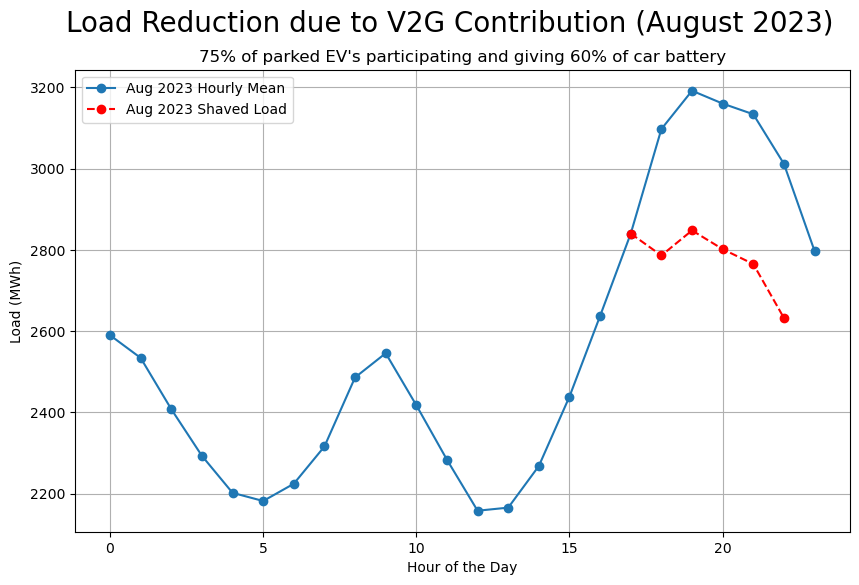

In [12]:
# visualizing scenario 7

august_data = hr_load[hr_load['month'] == 8]
avg_hourly_sdge = august_data.groupby('hour')['SDGE'].mean()
avg_hourly_sdge = avg_hourly_sdge / 1000

new_load_hours = [17, 18, 19, 20, 21, 22]
new_load_values = [avg_hourly_sdge[17], new_load_6p, new_load_7p, new_load_8p, new_load_9p, new_load_10p]


plt.figure(figsize=(10, 6))
plt.plot(avg_hourly_sdge.index, avg_hourly_sdge.values, marker='o', label='Aug 2023 Hourly Mean')
plt.plot(new_load_hours, new_load_values, marker='o', linestyle='--', color='red', label='Aug 2023 Shaved Load')
plt.suptitle('Load Reduction due to V2G Contribution (August 2023)', fontsize = 20)
plt.title('75% of parked EV\'s participating and giving 60% of car battery', fontsize = 12)
plt.xlabel('Hour of the Day')
plt.ylabel('Load (MWh)')
plt.grid(True)
plt.legend()
plt.savefig('plot_august_scenario_2.png', dpi=300, bbox_inches='tight')
plt.show()

# Function 

In [13]:
def v2g_contribution(participation_pct, willing_to_give_pct, month, hours):
    
    """
    Calculate the V2G (Vehicle to Grid) contribution to load reduction and visualize the result.

    Parameters:
    participation_pct (float): Percentage of parked EVs participating in V2G.
    willing_to_give_pct (float): Percentage of EV battery willing to give.
    month (int): Month for which the calculation is done (1-12).
    hours (list of int): List of hours (in 24-hour format) for which the calculation is done.

    Returns:
    float: The new load in MWh after considering the V2G contribution.
    """
    
    total_sdge_load = 0
    total_ev_to_grid = 0
    new_load_values = []

    for hour in hours:
        time_of_day = hr_load[(hr_load['Datetime'].dt.month == month) & (hr_load['Datetime'].dt.hour == hour)]
        total_sdge_load_for_hour = time_of_day['SDGE'].mean()

        BEV_Contribution = ev_avail.loc[ev_avail['hour'] == hour, 'sd_ev_week'].iloc[0] * (participation_pct / 100)
        BEV_storage = 71.8 * (willing_to_give_pct / 100) * 0.2  
        v2g = BEV_Contribution * BEV_storage * 0.9

        total_sdge_load += total_sdge_load_for_hour
        total_ev_to_grid += v2g

        new_load = total_sdge_load_for_hour - v2g
        new_load_values.append(new_load / 1000)  # convert back to MWh

    new_load_mwh = (total_sdge_load - total_ev_to_grid) / 1000  # convert back to MWh

    # Visualization
    month_data = hr_load[hr_load['month'] == month]
    avg_hourly_sdge = month_data.groupby('hour')['SDGE'].mean()
    avg_hourly_sdge = avg_hourly_sdge / 1000

    new_load_hours = [hour for hour in hours]
    all_hours = list(avg_hourly_sdge.index)
    month_name = calendar.month_name[month]
    
    if hours[0] > 0:
        start_hour = hours[0] - 1
        new_load_values.insert(0, avg_hourly_sdge[start_hour])
        new_load_hours.insert(0, start_hour)

    plt.figure(figsize=(10, 6))
    plt.plot(all_hours, avg_hourly_sdge.values, marker='o', label=f'{month_name} 2023 Hourly Mean')
    plt.plot(new_load_hours, new_load_values, marker='o', linestyle='--', color='red', label=f'{month_name} 2023 Shaved Load')
    plt.suptitle(f'Load Reduction due to V2G Contribution ({month_name} 2023)', fontsize=20)
    plt.title(f'{participation_pct}% of parked EV\'s participating and giving {willing_to_give_pct}% of car battery', fontsize=12)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Load (MWh)')
    plt.grid(True)
    plt.legend()
    plt.show()
    return new_load_mwh

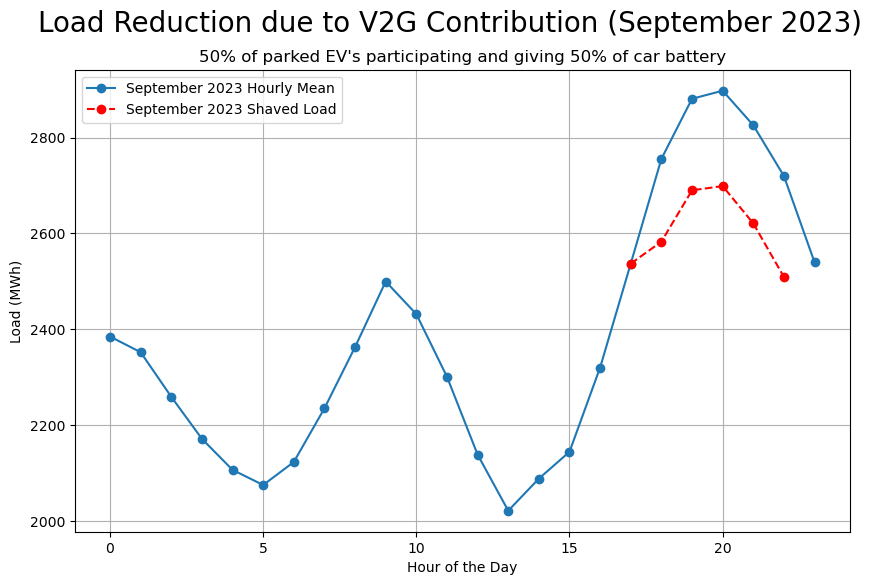

13100.741540791669


In [14]:
# Example
sept_50_50 = v2g_contribution(participation_pct=50, willing_to_give_pct=50, month=9, hours=[18, 19, 20, 21, 22])
print(sept_50_50)